<a href="https://colab.research.google.com/github/kenhuangsy/learning-tensorflow/blob/main/01_neural_network_regression_wth_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem we are going to simplifiy it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit 

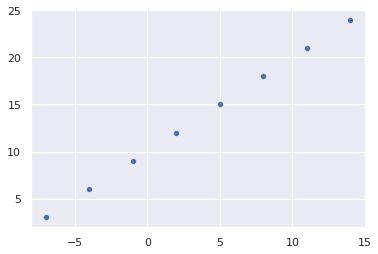

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize
sns.scatterplot(x = X, y = y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

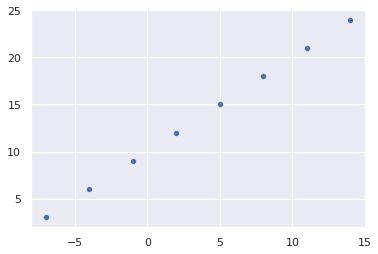

In [11]:
sns.scatterplot(x=X, y=y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
"""
You can also do:

model tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
"""

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 545ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model

1. **Creating a model** - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we train for longer)
model.fit(tf.expand_dims(X,axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 309ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Let's see if our prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [18]:
# Let's improve our model by adding more hidden layers and neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    #tf.keras.layers.Dense(100, activation = "relu"),
    #tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 369ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 10ms/ste

In [19]:
model.predict([17.0]) #Our model seems to be overfitting

array([[31.223137]], dtype=float32)

In [20]:
# Let's see if we can make another change to improve the model

#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01), #Changing the learning rate = most important
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 670ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5828 - mae: 11.5828
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8658 - mae: 10.8658
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1378 - mae: 10.1378
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3973 - mae: 9.3973
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6426 - mae: 8.6426
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8717 - mae: 7.8717
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0828 - mae: 7.0828
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8696 - mae: 6.8696
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2795 - mae: 7.2795
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - lo

In [21]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
model.predict([17.0]) 

array([[27.890127]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation:

You must **VISUALIZE**!

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the original labels?

In [23]:
# Make a bigger dataset
X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

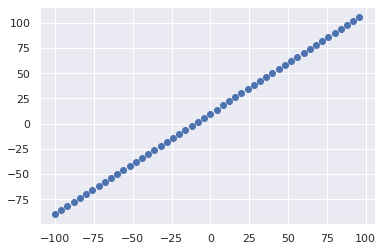

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - model trains on this data - 70-80%
* **Validation set** - model gets tuned on this data - 10-15%
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split into train and test
X_train = X[:40] #first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again

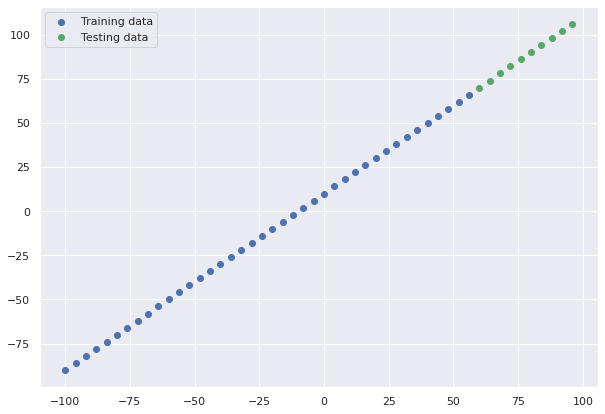

In [28]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c ="g", label = "Testing data")
plt.legend();

In [29]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

### Visualizing the model

In [30]:
# Let's build a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "one of many models we're going to build...")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [31]:
model.summary()

Model: "one of many models we're going to build..."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning)


🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

In [32]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [33]:
model.summary() # So we have two trainable parameters per hidden unit

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [35]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


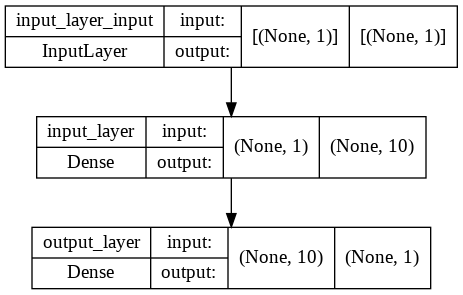

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

### Visualizing our model's predictions

It's a good idea to plot them against the labels

In [37]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (15,8))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend();

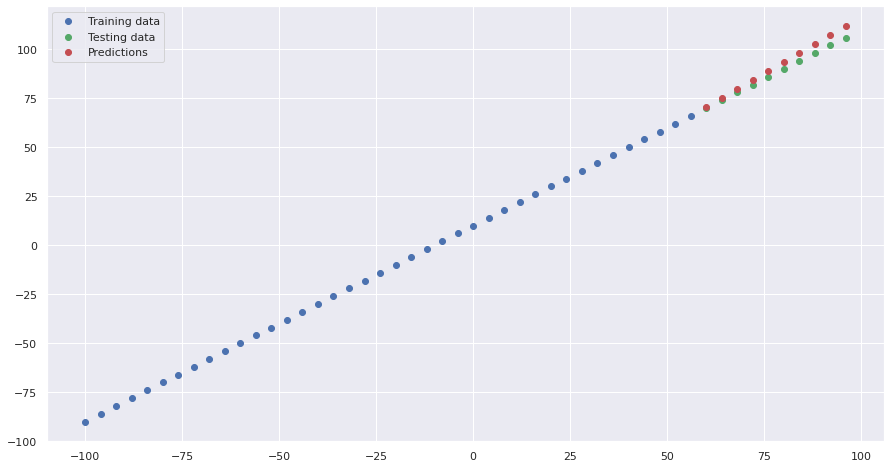

In [40]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance

For regression:
* MAE
* MSE
* Huber

In [41]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 134ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [42]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [43]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [44]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [45]:
# Calculate the mean squared error and rmse
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
rmse = np.sqrt(mse)
display(mse)
display(rmse)

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

3.6152651

In [46]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred = tf.squeeze(y_pred))
  
def rmse(y_true, y_pred):
  return np.sqrt(tf.metrics.mean_squared_error(y_true = y_true,
                                               y_pred = tf.squeeze(y_pred)))

### Running experiments to improve our model

1. model_1 - same as the original model, 1 layer, trained for 100 epochs

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 10ms/st

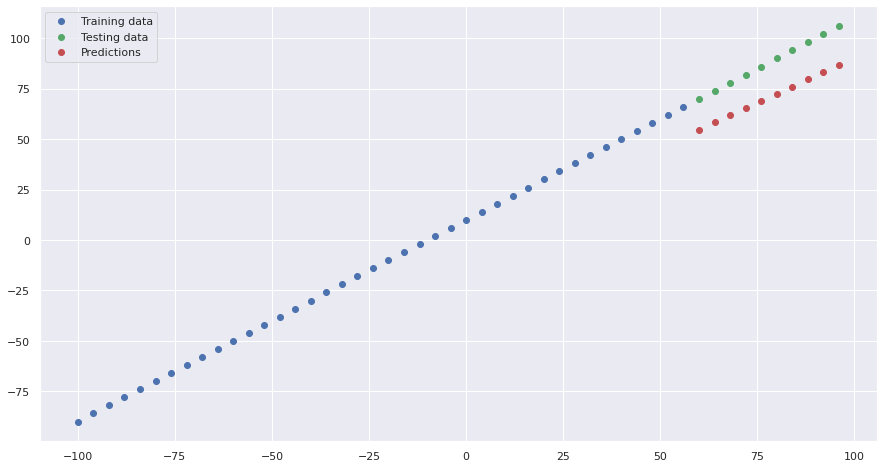

In [48]:
# Make and plot predictions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [49]:
# Calculate the MAE and MSE and RMSE
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
rmse_1 = rmse(y_test, y_pred_1)

display("mae:", mae_1)
display("mse:", mse_1)
display("rmse:", rmse_1)

'mae:'

<tf.Tensor: shape=(), dtype=float32, numpy=17.272385>

'mse:'

<tf.Tensor: shape=(), dtype=float32, numpy=300.0373>

'rmse:'

17.321585

2. model_2 - 2 layers with more hidden units, activation function, and trained for 100 epochs


In [50]:
# Create model_2

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)



Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 42.7588 - mae: 42.7588
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 21.5129 - mae: 21.5129
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 7.3575 - mae: 7.3575
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8161 - mae: 9.8161
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 5.5935 - mae: 5.5935
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 8.4142 - mae: 8.4142
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7563 - mae: 8.7563
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 6.0764 - mae: 6.0764
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 4.8092 - mae: 4.8092
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5125 - mae: 7.5125
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 5.4

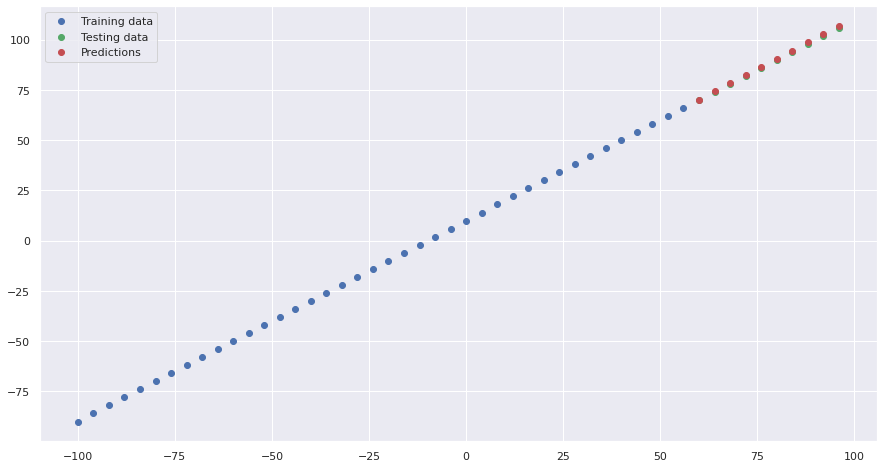

In [51]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [52]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
rmse_2 = rmse(y_test, y_pred_2)

display("mae:", mae_2)
display("mse:", mse_2)
display("rmse:", rmse_2)

'mae:'

<tf.Tensor: shape=(), dtype=float32, numpy=0.4514038>

'mse:'

<tf.Tensor: shape=(), dtype=float32, numpy=0.2302362>

'rmse:'

0.47982934

3. model_3 - 3 hidden layers with 50 hidden units, relu activation function, Adam optimizer, 500 epochs

In [53]:
# 1. Create the model
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["mae"])

# 3. Fit the model

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 41.1260 - mae: 41.1260
Epoch 2/500
2/2 [==============================] - 0s 22ms/step - loss: 38.8013 - mae: 38.8013
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 36.7795 - mae: 36.7795
Epoch 4/500
2/2 [==============================] - 0s 22ms/step - loss: 34.8020 - mae: 34.8020
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 33.1554 - mae: 33.1554
Epoch 6/500
2/2 [==============================] - 0s 16ms/step - loss: 31.4749 - mae: 31.4749
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 29.6331 - mae: 29.6331
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 27.5403 - mae: 27.5403
Epoch 9/500
2/2 [==============================] - 0s 22ms/step - loss: 25.5943 - mae: 25.5943
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 23.5258 - mae: 23.5258
Epoch 11/500
2/2 [==============================] - 0

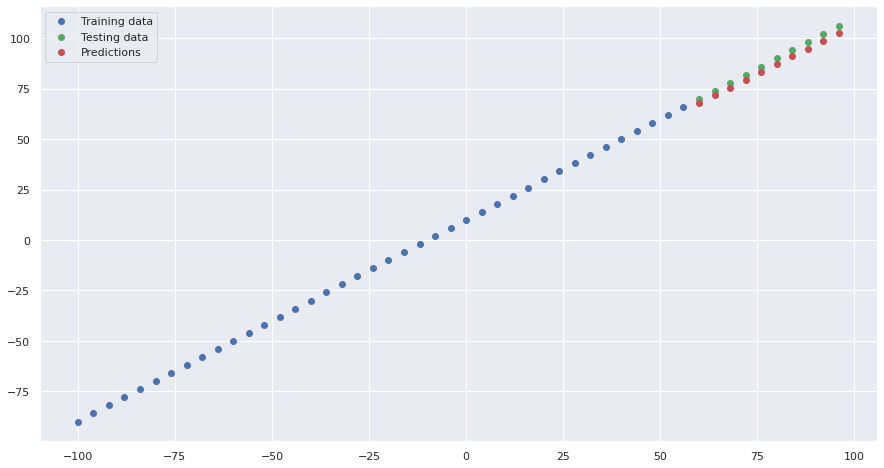

In [54]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [55]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
rmse_3 = rmse(y_test, y_pred_3)

display("mae:", mae_3)
display("mse:", mse_3)
display("rmse:", rmse_3)

'mae:'

<tf.Tensor: shape=(), dtype=float32, numpy=2.7726235>

'mse:'

<tf.Tensor: shape=(), dtype=float32, numpy=7.8704767>

'rmse:'

2.805437

### Comparing the results of our experiments


In [56]:
# Let's compare our model's results using a pandas dataframe

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy(), rmse_1],
                 ["model_2", mae_2.numpy(), mse_2.numpy(), rmse_2],
                 ["model_3", mae_3.numpy(), mse_3.numpy(), rmse_3]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse", "rmse"])
all_results

,model,mae,mse,rmse
0,model_1,17.272385,300.037292,17.321585
1,model_2,0.451404,0.230236,0.479829
2,model_3,2.772624,7.870477,2.805437


In [57]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                100       
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

**Resource:** As you build more models, you'll want to look into using: 
* TensorBoard - a component of the TensorFlow library to help track modelling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into tensorboard)

## Saving our Model

Saving our models allows us to use them outside of Google Colab such as in a web application or an app.

There are two main formats we can save our models to:

1. The SavedModel format
2. The HDF5 format

In [58]:
# Save model using the SavedModel format
model_3.save("best_model_SavedModel_format")

In [59]:
# Save model using the HDF5 format
model_3.save("best_model_HDF5_format.h5")

## Loading Saved Models

In [60]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                100       
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compare model_2 predictions with SavedModel model_2 predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [62]:
mae(y_true=y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [63]:
model_2_preds.squeeze()

array([ 70.19557,  74.25265,  78.30972,  82.36694,  86.42391,  90.4805 ,
        94.53708,  98.5935 , 102.64922, 106.70494], dtype=float32)

In [64]:
loaded_SavedModel_format_preds.squeeze()

array([ 67.896545,  71.74919 ,  75.60015 ,  79.45111 ,  83.30206 ,
        87.15303 ,  91.00399 ,  94.854935,  98.70589 , 102.55686 ],
      dtype=float32)

In [65]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                100       
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [67]:
model_2_preds.squeeze()

array([ 70.19557,  74.25265,  78.30972,  82.36694,  86.42391,  90.4805 ,
        94.53708,  98.5935 , 102.64922, 106.70494], dtype=float32)

In [68]:
loaded_h5_model_preds.squeeze()

array([ 67.896545,  71.74919 ,  75.60015 ,  79.45111 ,  83.30206 ,
        87.15303 ,  91.00399 ,  94.854935,  98.70589 , 102.55686 ],
      dtype=float32)

# A larger example

In [69]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [70]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
#Let's one hot encode our dataframe to get all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [72]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]
display(X)
display(y)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [73]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

display(X_train)
display(y_train)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 11)
(1070,)
(268, 11)
(268,)


In [75]:
# Build a neural network
tf.random.set_seed(42)
# 1. Build model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit model
insurance_model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10967.0264 - mae: 10967.0264
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 9702.670

In [76]:
#Check the results of the model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

In [77]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Let's improve our model (no scaling yet)


In [78]:
# Build a neural network
tf.random.set_seed(42)
# 1. Build model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# 3. Fit model
insurance_model_2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 9668.1113 - mae: 9668.1113
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 7162.3931 - mae: 7162.3931
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 6633.5522 - mae: 6633.5522
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 6343.0488 - mae: 6343.0488
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 5817.6743 - mae: 5817.6743
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 4604.2959 - mae: 4604.2959
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 3870.1855 - mae: 3870.1855
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 3710.6331 - mae: 3710.6331
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 3255.9526 - mae: 3255.9526
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 3164.4478 - mae: 3164.4478

In [79]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1365.9414 - mae: 1365.9414


[1365.94140625, 1365.94140625]

In [80]:
history = insurance_model_2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 3ms/step - loss: 1558.5204 - mae: 1558.5204
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 1747.3013 - mae: 1747.3013
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 1628.4905 - mae: 1628.4905
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 1684.7074 - mae: 1684.7074
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 1530.8312 - mae: 1530.8312
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 1586.2242 - mae: 1586.2242
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 1532.8264 - mae: 1532.8264
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 1621.9420 - mae: 1621.9420
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 1613.9684 - mae: 1613.9684
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 1580.8082 - mae: 1580.8082

Text(0.5, 0, 'epochs')

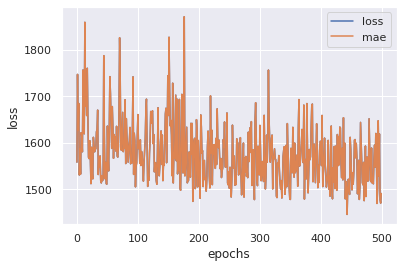

In [81]:
# Plot the loss curve or training curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

However, you can test both to see which one performs better

In [84]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


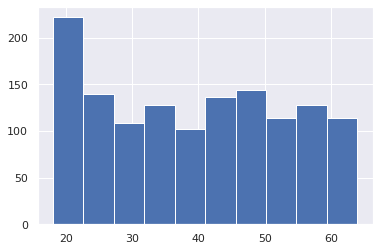

In [85]:
X["age"].hist()

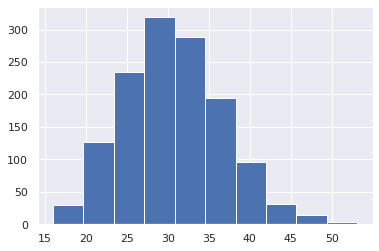

In [86]:
X["bmi"].hist()

In [87]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#read in insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from sklearn

In [89]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# Fit the column transformer to our training data
X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.transform(X_test)


In [93]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [92]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [94]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [96]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Now let's build a neural network model to fit on our normalized data

In [106]:
tf.random.set_seed(42)

#1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

#3. Fit the model
model.fit(X_train_normal, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 11368.9824 - mae: 11368.9824
Epoch 2/500
34/34 [==============================] - 0s 5ms/step - loss: 7151.8247 - mae: 7151.8247
Epoch 3/500
34/34 [==============================] - 0s 5ms/step - loss: 4326.0317 - mae: 4326.0317
Epoch 4/500
34/34 [==============================] - 0s 5ms/step - loss: 3462.7109 - mae: 3462.7109
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 3381.2825 - mae: 3381.2825
Epoch 6/500
34/34 [==============================] - 0s 6ms/step - loss: 3323.4763 - mae: 3323.4763
Epoch 7/500
34/34 [==============================] - 0s 6ms/step - loss: 3232.4080 - mae: 3232.4080
Epoch 8/500
34/34 [==============================] - 0s 5ms/step - loss: 3251.8342 - mae: 3251.8342
Epoch 9/500
34/34 [==============================] - 0s 6ms/step - loss: 3140.3816 - mae: 3140.3816
Epoch 10/500
34/34 [==============================] - 0s 6ms/step - loss: 3078.4102 - mae: 3078.41

In [107]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1689.0631 - mae: 1689.0631


[1689.0631103515625, 1689.0631103515625]

In [100]:
#1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

#3. Fit the model
model_2.fit(X_train_normal, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 12688.2285 - mae: 12688.2285
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 7917.5664 - mae: 7917.5664
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 6415.8315 - mae: 6415.8315
Epoch 4/500
34/34 [==============================] - 0s 5ms/step - loss: 4169.5659 - mae: 4169.5659
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 3433.6399 - mae: 3433.6399
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 3354.0508 - mae: 3354.0508
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 3278.7537 - mae: 3278.7537
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 3295.9548 - mae: 3295.9548
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 3231.8491 - mae: 3231.8491
Epoch 10/500
34/34 [==============================] - 0s 5ms/step - loss: 3232.3267 - mae: 3232.32

In [101]:
model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1717.7576 - mae: 1717.7576


[1717.757568359375, 1717.757568359375]